In [2]:
from IPython.display import HTML
HTML('''
<style>
.prompt {
  display: none;
}
</style>
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

1. [Analysis](analysis.ipynb)
2. [test](modeling_analysis.ipynb)

In [7]:
import statistical_modeling as model

In order to explore answers to our hypotheses, we use feature selection and multivariate linear regression. To begin, we used recursive feature elimination (RFE) to select the features that were impacting the number of hate crimes. With RFE, we selected the following features for our analysis: *share_unemployed_seasonal*, *share_population_with_high_school_degree*, *share_white_poverty*, and *gini_index*. Interestingly, these features are related to income and education, which are two factors that often affect the amount of crime that ocurrs amongst a population in general. Using these features in our analysis can help us understand how these factors may affect hate crimes as well. Using these selected features in our modeling results in the summary table below.  

In [8]:
model.multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hate_crimes   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     9.745
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           9.16e-06
Time:                        16:32:50   Log-Likelihood:                 14.833
No. Observations:                  50   AIC:                            -19.67
Df Residuals:                      45   BIC:                            -10.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -9.5499      1.799     -5.309      0.000     -13.173      -5.927
share_unemployed_seasonal                    4.8572      3.364      1.444      0.156      -1.919      11.633
share_population_with_high_school_degree     6.6298      1.316      5.038      0.000       3.979       9.280
share_white_poverty                          1.1103      1.352      0.821      0.416      -1.613       3.833
gini_index                                   8.2733      1.771      4.672      0.000       4.707      11.840
==============================================================================
Omnibus:                        2.289   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.605
Skew:                           0.430   Prob(JB):                        0.448
Kurtosis:                       3.176   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this table, we see an R-squared value of .464. This means that we can explain about 46.4% of the variation in hate crimes using these features (*share_unemployed_seasonal*, *share_population_with_high_school_degree*, *share_white_poverty*, *gini_index*) as variables.  

In looking more closely at the coefficients for each feature, we see that all of the variables contribute to an increase in hate crimes. The *gini_index* contributes to the largest increase in hate crimes with an observed association of 8.2733 hate crimes for each unit increase in gini index.  

Standard error is another way of assessing our model and helps measure how accurate the estimate is in comparison to the orginal population. *share_population_with_high_school_degree* has the lowest standard error with a magnitude of 1.316, which means this feature provides the most accurate prediction when compared to the original population.  

In order to further explore our data and understand the effect of the features in this dataset, we did further modeling using all of the features in the dataset using multivariate linear regression. Using all of the features in our model results in the summary table below.

In [9]:
model.multi_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_hate_crimes   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     4.454
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           0.000438
Time:                        16:32:53   Log-Likelihood:                -80.036
No. Observations:                  50   AIC:                             180.1
Df Residuals:                      40   BIC:                             199.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -43.8072     18.294     -2.395      0.021     -80.780      -6.834
median_household_income                   2.077e-05   5.08e-05      0.409      0.685   -8.19e-05       0.000
share_unemployed_seasonal                   26.2347     27.027      0.971      0.338     -28.388      80.857
share_population_in_metro_areas             -2.6598      1.843     -1.443      0.157      -6.385       1.066
share_population_with_high_school_degree    22.6704     13.553      1.673      0.102      -4.722      50.063
share_non_citizen                           21.0749     12.525      1.683      0.100      -4.240      46.390
share_white_poverty                          2.9232     16.349      0.179      0.859     -30.119      35.966
gini_index                                  58.9289     15.413      3.823      0.000      27.778      90.080
share_non_white                             -3.9257      2.813     -1.395      0.171      -9.612       1.760
share_voters_voted_trump                    -1.7975      3.107     -0.578      0.566      -8.078       4.483
==============================================================================
Omnibus:                        0.801   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.360
Skew:                           0.196   Prob(JB):                        0.835
Kurtosis:                       3.138   Cond. No.                     8.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interestingly, using all of the features in the dataset results in a higher R-squared value than that from our model using feature selection. This R-squared value tells us that we can explain about 50.1% of the variation in hate crimes using all of the features in the data set as variables. While this is a relatively small difference, it is important to note in our analysis.  

When analyzing the coefficients for each feature, we see that most of the variables contribute to an increase in hate crimes, except for *share_population_in_metro_areas*, *share_non_white*, and *share_voters_voted_trump*. These three features contribute to a small decrease in hate crimes. Again, in this model the *gini_index* contributes to the largest increase in hate crimes based on the coefficient.  

While creating these models and performing this analysis provides some insight into how different factors affect hate crimes, there is still a lot left untold through these results. It is difficult to do this analysis across all 50 states because there are likely different reasons in each state that hate crimes occur. In a future report, it would be interesting and important to do analysis for each state to understand how these results change in different states. It is also important to remember that different states report hate crimes differently, so comparing the number of hate crimes in states that report them differently will also affect the results of these models. While these models do provide us insight into the features that are affecting the data and the magnitudes of the effect, we cannot use these models to provide an exact interpretation of exactly what factors contribute to an increase in the number of hate crimes.  

After using our models to interpret the effects of different features on the number of hate crimes in different states, we made predictions using this model. The graph below shows the actual and predicted number of hate crimes in each state using the model with only the selected features from the recursive feature elimination method.

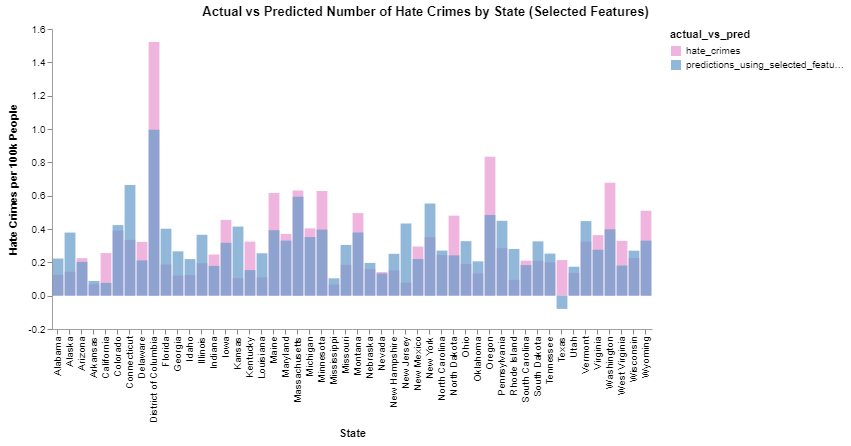

In [10]:
model.selected_features_actual_preds

The following graph shows the actual and predicted number of hate crimes in each state using the model with all of the features in the dataset.

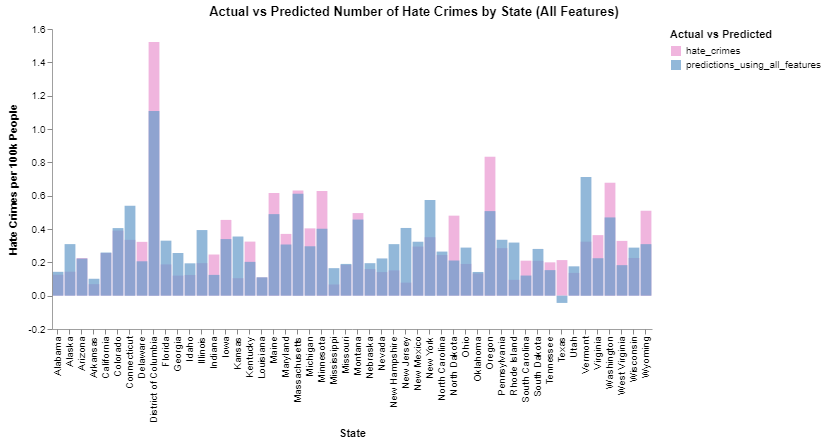

In [11]:
model.all_features_actual_preds

In comparing the two graphs, we do not see too much of a difference. The predictions are relatively similar overall. We see that the model using all of the features does somewhat better in predicting - take a look at District of Columbia and Texas for example. These graphs help us see for which states our model may perform better, and for which states this type of model does not perform well.  

The scatter plots below further assess the accuracy of the predictions and compare the model using the selected features with the model using all of the features. The red line on these plots indicates a perfect prediction, or zero difference between the actual number of hate crimes and the predicted number. In these residual plots we see that the models perform very similarly. We see perhaps some improvement when using all of the features, but there is no significant noticable difference.

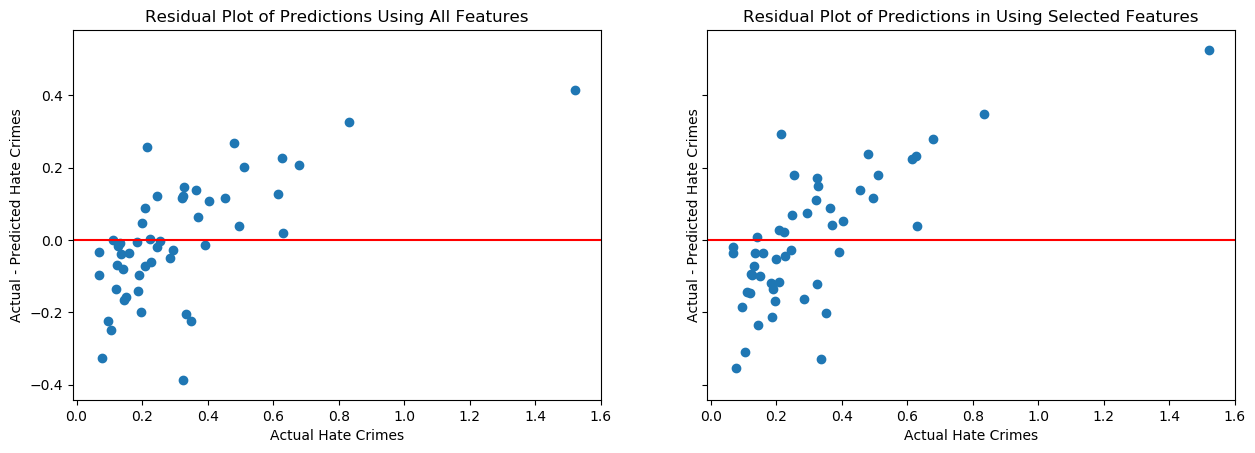

In [12]:
model.f